## Matplotlib

Let's start with a simple 2D Plot. We work with vectors and matrices, so we need numpy too.

In [3]:
import numpy as np

# create 2 numpy arrays with x and y values
nvalues=100
a=-10.0
b=10.0
x=np.linspace(a,b,nvalues)
y=np.sin(x)

# get the plot lib 
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

## Task

Extend the plot above with a second function $g(x)=cos(x)$, plotted in a different color and add:
 * plot grid
 * axis labels
 * legends
 * a label pointing to the value of $sin(\pi)$ and saying "This is $sin(\pi)$"
 * a title

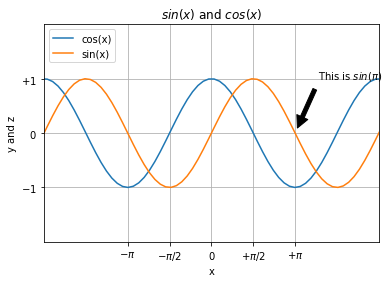

In [4]:
# TODO
z=np.cos(x)
plt.plot(x,z, label='cos(x)')
plt.plot(x,y, label='sin(x)')
plt.annotate('This is $sin(\pi)$', 
             xy=(np.pi, np.sin(np.pi)), 
             xytext=(4, 1),
             arrowprops=dict(facecolor='black', shrink=0.1),
             )
plt.xlabel('x')
plt.ylabel('y and z')

plt.legend(loc='upper left')
plt.title('$sin(x)$ and $cos(x)$')

plt.grid()
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])
plt.ylim(-2,2)
plt.xlim(-2*np.pi,2*np.pi)

plt.show()

Barplots are another useful variant of plots, as a minimalistic example see

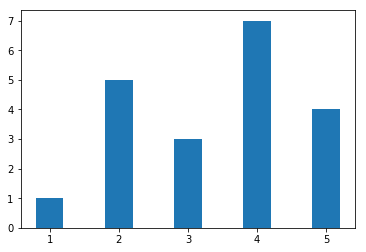

In [5]:
x=np.array([1,2,3,4,5])
h=np.array([1,5,3,7,4])
w=0.4

fig, ax = plt.subplots()
ax.bar(x,h,w )
plt.show()

## Task

Understand the parameters of bar plots, then make a bar plot of the actual number of Corona cases in  
the German states. The data can be found at:

https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html

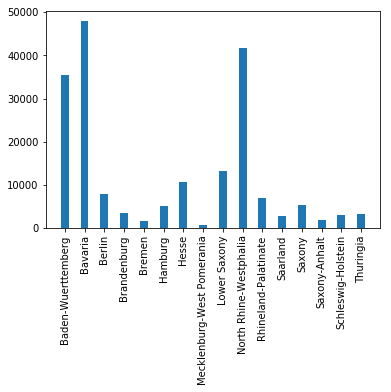

In [6]:
# TODO
state=np.array(['Baden-Wuerttemberg', 'Bavaria', 'Berlin','Brandenburg', 'Bremen', 'Hamburg', 'Hesse', 
                'Mecklenburg-West Pomerania', 'Lower Saxony','North Rhine-Westphalia', 'Rhineland-Palatinate', 
                'Saarland', 'Saxony', 'Saxony-Anhalt', 'Schleswig-Holstein', 'Thuringia'])
number=np.array([35409, 47995, 7975, 3413, 1653, 5175, 10645, 794, 13327, 41678, 6924, 2801, 5436, 1856, 3137, 3231])
h=.05
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')
#ax.bar(state,number,w ) #the name of state is not readable(How can I put the labels in vertical mode?)
ax.bar(state,number,w )
plt.show()

## Plotting in 3D

Datas like $z=f(x,y)$ can be plotted with ```surf```

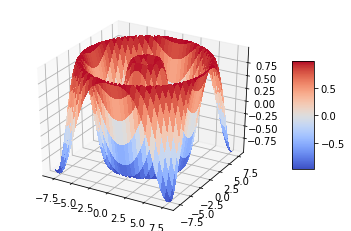

In [7]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax  = fig.gca(projection='3d')

# create data vecors
x = np.arange(-8, 8, 0.25)
y = np.arange(-8, 8, 0.25)
# create a meshgrid
X, Y = np.meshgrid(x, y)
# compue function values
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# plot it
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

## Task

Extend the plot above with title, axes labels. Then find out what colormaps are available. 

Text(0.5, 0.92, '3D plot')

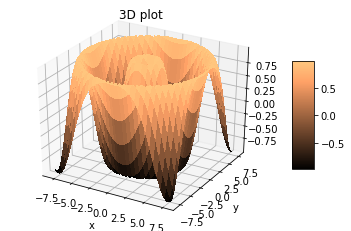

In [8]:
# TODO
fig = plt.figure()
ax  = fig.gca(projection='3d')

# create data vecors
x = np.arange(-8, 8, 0.25)
y = np.arange(-8, 8, 0.25)
# create a meshgrid
X, Y = np.meshgrid(x, y)
# compue function values
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# plot it
surf = ax.plot_surface(X, Y, Z, cmap=cm.copper, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('x')
plt.ylabel('y')

plt.title('3D plot')

## Parametric curves and surfaces

Parametric curves are mappings 
$$
\Gamma: \qquad t \in [a,b] \rightarrow R^3
$$
such that we have coordinates $x(t),y(t),z(t)$, for example the screw line
$$
x(t)=r cos(t) \\
y(t)=r sin(t) \\
z(t)=h t
$$


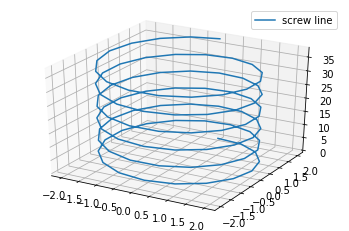

In [9]:

fig = plt.figure()
ax = fig.gca(projection='3d')


t = np.linspace(0, 12 * np.pi, 100)
r = 2
h = 1
x = r * np.sin(t)
y = r * np.cos(t)
z = h * t

ax.plot(x, y, z, label='screw line')
ax.legend()

plt.show()

## Task 

Visualize torus knots which are curves running around a torus.
A (p,q)-torus knot winds q times around a circle in the interior of the torus, and p times around its center.

For some pictures see: https://www-user.tu-chemnitz.de/~uro/work/pqcurves/index.html

For details and parametrization see: https://en.wikipedia.org/wiki/Torus_knot



In [14]:
def torus_knot(p,q):
    fig = plt.figure()
    ax = fig.gca(projection='3d')


    t = np.linspace(0, 2 * np.pi, 100)
    r = np.cos(q*t)+2
    x = r * np.sin(p*t)
    y = r * np.cos(p*t)
    z = -np.sin(q*t)
    ax.plot(x, y, z, label=f'({p},{q})-torus')
    ax.legend()

    plt.show()

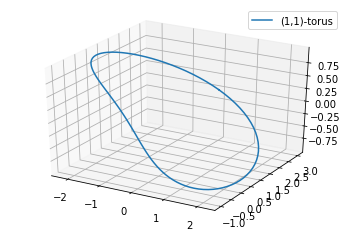

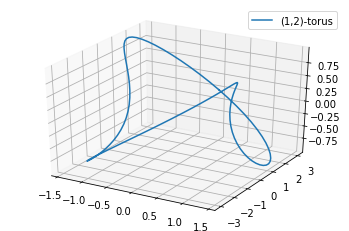

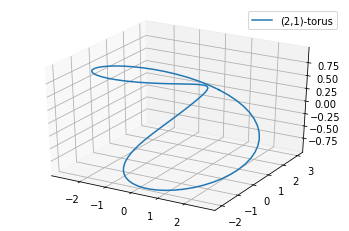

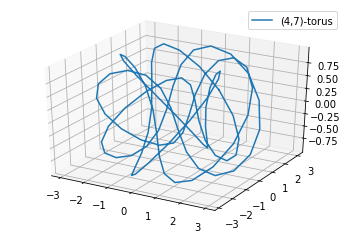

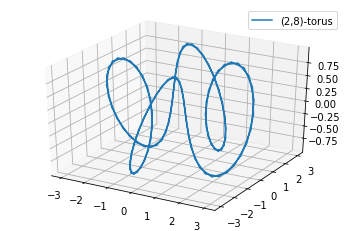

In [15]:
torus_knot(1,1)
torus_knot(1,2)
torus_knot(2,1)
torus_knot(4,7)
torus_knot(2,8)


## Parametric surfaces 

Parametric surfaces are mappings
$$
\Sigma: \qquad (u,v) \in I \subset R^2 \rightarrow R^3
$$
such that we have coordinates $x(u,v),y(u,v),z(u,v)$, for example the sphere with radius r can be parametrized as
$$
x(u,v)=r sin(v) cos(u) \\
y(u,v)=r sin(v) sin(u) \\
z(u,v)=r cos(v) \\
u \in [0,2\pi], v \in [0,\pi]
$$

## Task

Visualize the sphere as parametric surface.


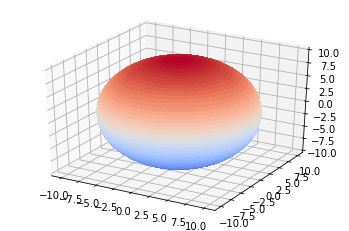

In [12]:
# TODO
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make Data
U=np.linspace(0,2*np.pi, 100)
V=np.linspace(0,np.pi, 100)
u,v=np.meshgrid(U,V)
r=10

#define Function
x=r*np.sin(v)*np.cos(u)
y=r*np.sin(v)*np.sin(u)
z=r*np.cos(v)

surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm, linewidth=0, antialiased=False)


plt.show()


# Task

Visualize the so called "Kuensche Fläche", considered by T. Kühn in 1884 
( Kuen, T. "Ueber Flächen von constantem Krümmungsmass." Sitzungsber. d. königl. Bayer. Akad. Wiss. Math.-phys. Classe, Heft II, 193-206, 1884. )

The surface is given as:

$$
x(u,v)=\frac{2 (cos(u) +u sin(u)  )  sin(v) } { 1+u^2 sin^2(v) } \\
y(u,v)=\frac{2 (sin(u) -u cos(u)  )  sin(v) } { 1+u^2 sin^2(v)  } \\
z(u,v)=\frac{log( tan( \frac{1}{2} v)  ) + 2 cos(v)  } { 1+u^2 sin^2(v)  } \\
$$

with $u \in [-4,4] $ and $v \in [\epsilon, \pi-\epsilon]$ where $\epsilon$ is a small number like 0.0001 to avoid 
trouble with singularities.

It is a special surface with constant negative Gaussian curvature.

Further reading: https://mathworld.wolfram.com/KuenSurface.html

You may use a c-coded notation of the formulas above to avoid typos, which can be easier adopted to python code. 
Here is it:

<pre>
void kuen(double u, double v , double *x , double *y , double *z)
{
   *x=2*(cos(u) +u*sin(u)  ) *sin(v) / ( 1+u*u*sin(v)*sin(v) );
   *y=2*(sin(u) -u*cos(u)  ) *sin(v) / ( 1+u*u*sin(v)*sin(v) );
   *z=log( tan(v/2.0)  ) + 2*cos(v) /  ( 1+u*u*sin(v)*sin(v) );
   return 0;
}
</pre>



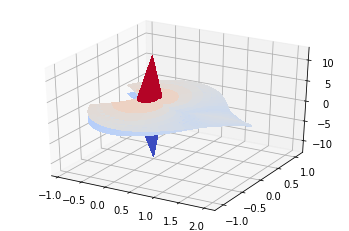

In [13]:
# TODO
# TODO
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make Data
e=0.000001
U=np.linspace(-4,4, 100)
V=np.linspace(e,np.pi-e, 100)
u,v=np.meshgrid(U,V)
r=10

#Define Function
x=2*(np.cos(u) +u*np.sin(u)) *np.sin(v) / ( 1+u*u*np.sin(v)*np.sin(v) );
y=2*(np.sin(u) -u*np.cos(u)) *np.sin(v) / ( 1+u*u*np.sin(v)*np.sin(v) );
z=  np.log(np.tan(v/2.0)) + 2*np.cos(v) / ( 1+u*u*np.sin(v)*np.sin(v) );

surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm, linewidth=0, antialiased=False)


plt.show()